# Proyek Belajar Pengembangan Machine Learning: Proyek Analisis Sentimen Game Honor of Kings
- **Nama:** Muhammad Ferry Fernanda
- **Email:** feefeenan@gmail.com
- **ID Dicoding:** ferfernanda

# **Import Library**

In [ ]:
!pip install google-play-scraper

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

Perintah di atas akan mengunduh dan menginstal pustaka google_play_scraper serta dependensinya jika diperlukan. Setelah instalasi selesai, Anda dapat mengimpor dan menggunakannya dalam notebook Anda untuk mengambil data dari Play Store dan melanjutkan dengan analisis sentimen.

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
import numpy as np  # NumPy untuk komputasi numerik
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from nltk.stem import PorterStemmer
import requests
from wordcloud import WordCloud
import csv

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Scapping Dataset

Pada proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait game "Honor of Kings" di Play Store. Analisis sentimen akan membantu kita untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan mereka terhadap aplikasi ini.

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.levelinfinite.sgameGlobal', # ID aplikasi
    lang='en',             # Bahasa ulasan (default: 'en')
    country='us',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=15000             # Jumlah maksimum ulasan yang ingin diambil
)

# Loading Dataset

In [ ]:
df_scrap = pd.DataFrame(scrapreview)
df_scrap

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f656ffca-459a-475e-9659-cd55327b2c99,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The algorithm wouldn't let you go higher if yo...,2,49,9.4.1.5,2024-07-16 16:53:20,None,NaT,9.4.1.5
1,2024514a-2609-43a5-bbc0-72610d31a23f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's started out as a fantastic game but it's ...,1,139,9.4.1.4,2024-07-08 15:50:15,"Hi player, \nYou can report the plug-in after ...",2024-07-10 02:28:13,9.4.1.4
2,0862425d-0926-4d5f-a0e0-9f48f70e6861,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Thought it's better than MLBB but the experien...,2,650,9.4.1.4,2024-07-09 04:33:55,Dear Player\nEach lane may have a different nu...,2024-07-10 01:52:24,9.4.1.4
3,d5c5e701-2cc5-43b7-92b8-558fc8f5d25a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I like this game so much. It's the main reason...,4,238,9.4.1.5,2024-07-20 09:11:53,None,NaT,9.4.1.5
4,69dab208-ab2d-45f1-a926-cf366449f49a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This game is great and I think it could really...,5,427,9.4.1.5,2024-07-19 04:19:33,None,NaT,9.4.1.5
...,...,...,...,...,...,...,...,...,...,...,...
53569,effb7632-4c7f-454b-8976-c191e17ab612,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,❤️❤️❤️❤️❤️❤️❤️,5,0,None,2024-06-22 09:56:50,None,NaT,None
53570,e240aba0-0b1b-4cce-8637-77289701164a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,❤️,5,0,None,2024-04-26 02:20:05,None,NaT,None
53571,fa796f36-1c09-4354-8fae-ee13e140ba6d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,❤️❤️❤️,5,0,None,2024-06-25 05:49:24,None,NaT,None
53572,6da47918-dc84-4600-8aff-d7dca54c9d07,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,❤️,5,0,None,2024-06-28 23:39:51,None,NaT,None


In [ ]:
df_scrap.score.value_counts()

score
5    38498
1     7203
4     4312
3     2230
2     1331
Name: count, dtype: int64

In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Function to detect language and filter only English texts
def is_english(text):
    try:
        # Use langdetect to determine if the text is in English
        return detect(text) == 'en'
    except LangDetectException:
        # Handle exceptions, such as empty strings or unrecognizable text
        return False

df_scrap['is_english'] = df_scrap['content'].apply(is_english)
df_english = df_scrap[df_scrap['is_english']].copy()
df_english.drop(columns='is_english', inplace=True)

In [ ]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26875 entries, 0 to 53520
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              26875 non-null  object        
 1   userName              26875 non-null  object        
 2   userImage             26875 non-null  object        
 3   content               26875 non-null  object        
 4   score                 26875 non-null  int64         
 5   thumbsUpCount         26875 non-null  int64         
 6   reviewCreatedVersion  21346 non-null  object        
 7   at                    26875 non-null  datetime64[ns]
 8   replyContent          3809 non-null   object        
 9   repliedAt             3809 non-null   datetime64[ns]
 10  appVersion            21346 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.5+ MB


In [ ]:
df_english.score.value_counts()

score
5    17222
1     4738
4     2439
3     1490
2      986
Name: count, dtype: int64

In [ ]:
score_5_df = df_english[df_english['score'] == 5]

score_5_sampled = score_5_df.sample(n=7000, random_state=42)

remaining_scores_df = df_english[df_english['score'] != 5]

rework_df = pd.concat([score_5_sampled, remaining_scores_df], ignore_index=True)

rework_df = rework_df.sample(frac=1, random_state=42).reset_index(drop=True)

rework_df.score.value_counts()

score
5    7000
1    4738
4    2439
3    1490
2     986
Name: count, dtype: int64

In [ ]:
rework_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,241dfc4d-7f76-40cf-a5af-898e434716a2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Its some times laggy and the heroes isnt even ...,3,0,9.4.1.4,2024-07-10 05:00:35,None,NaT,9.4.1.4
1,4c17ecd6-14ed-469b-afa7-156994c4df92,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"This Game was so cool, But sometimes when I pl...",4,0,9.4.1.4,2024-07-05 13:17:55,None,NaT,9.4.1.4
2,1fc734f0-1e4e-4d8e-8fd3-4f6d6a4f7be1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"When enter room to play the game, can't click ...",3,0,9.4.1.3,2024-06-26 08:38:19,"Hi player, \nIf you are currently experiencing...",2024-06-26 08:34:43,9.4.1.3
3,71455c53-23f9-478a-a988-efdb1b164adf,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Actually, this game is fun. but the matchmakin...",2,0,None,2024-07-20 10:01:44,"Hi,player! \nThe game generally matches player...",2024-07-23 03:25:22,None
4,4fb5f137-9a99-47e3-93fb-2b319488f564,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,loving the game. Great lore.,5,0,9.4.1.3,2024-06-24 00:16:59,None,NaT,9.4.1.3
...,...,...,...,...,...,...,...,...,...,...,...
16648,f9dd920e-b996-4f41-8028-c4b4fc2d4435,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Bad experience so laggggg timi even your Good ...,1,2,None,2024-07-12 14:29:37,"Hi, player!\nWe suggest you try the following ...",2024-07-15 07:49:43,None
16649,169904d0-977a-4a13-8a88-e8559d088b3c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,awesome and great games,4,0,9.4.1.4,2024-07-04 15:25:57,None,NaT,9.4.1.4
16650,d51126ff-bcee-40ad-8148-fc6d01906eed,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Five stars isn't enough let give it 10 friggin...,5,0,9.4.1.3,2024-06-28 09:26:06,None,NaT,9.4.1.3
16651,1c23b722-920c-4782-96be-af5116b24085,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very nice and graphics and gameplay .,5,0,9.4.1.3,2024-07-20 08:01:55,None,NaT,9.4.1.3


In [ ]:
rework_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16653 entries, 0 to 16652
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              16653 non-null  object        
 1   userName              16653 non-null  object        
 2   userImage             16653 non-null  object        
 3   content               16653 non-null  object        
 4   score                 16653 non-null  int64         
 5   thumbsUpCount         16653 non-null  int64         
 6   reviewCreatedVersion  12601 non-null  object        
 7   at                    16653 non-null  datetime64[ns]
 8   replyContent          3575 non-null   object        
 9   repliedAt             3575 non-null   datetime64[ns]
 10  appVersion            12601 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.4+ MB


#Preprocessing

In [ ]:
def cleaning(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'https?://\S+|www.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = text.lower()
    return text

def tokenizing(clean_text):
    return word_tokenize(clean_text)

def filtering(tokens):
    listStopwords = set(stopwords.words('english'))
    listStopwords.update(['game'])
    return [word for word in tokens if word not in listStopwords]

def stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokens])
    return stemmed_text

def preprocessing_text(text):
    text = cleaning(text)
    tokens = tokenizing(text)
    tokens = filtering(tokens)
    texts = stemming(tokens)

    return texts

In [ ]:
# Terapkan preprocessing pada kolom content untuk mendapatkan content_clean
rework_df['preprocessing_content'] = rework_df['content'].apply(preprocessing_text)

In [ ]:
content_df = rework_df[['content', 'preprocessing_content', 'score']]
content_df

,content,preprocessing_content,score
0,Its some times laggy and the heroes isnt even ...,time laggi hero isnt even free,3
1,"This Game was so cool, But sometimes when I pl...",game cool sometim play game cost lag,4
2,"When enter room to play the game, can't click ...",enter room play game cant click anyth phone pl...,3
3,"Actually, this game is fun. but the matchmakin...",actual game fun matchmak somehow unfair well n...,2
4,loving the game. Great lore.,love game great lore,5
...,...,...,...
16648,Bad experience so laggggg timi even your Good ...,bad experi laggggg timi even good network dela...,1
16649,awesome and great games,awesom great game,4
16650,Five stars isn't enough let give it 10 friggin...,five star isnt enough let give friggin starsth...,5
16651,Very nice and graphics and gameplay .,nice graphic gameplay,5


In [ ]:
# Merubah baris yang hanya berisi spasi atau nilai NaN
content_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16653 entries, 0 to 16652
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   content                16653 non-null  object
 1   preprocessing_content  16638 non-null  object
 2   score                  16653 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.4+ KB


In [ ]:
content_df.isna().sum()

content                   0
preprocessing_content    15
score                     0
dtype: int64

In [ ]:
content_df.duplicated().sum()

1245

In [ ]:
content_df.dropna(inplace=True)

In [ ]:
content_df.drop_duplicates(inplace=True)

In [ ]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15394 entries, 0 to 16652
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   content                15394 non-null  object
 1   preprocessing_content  15394 non-null  object
 2   score                  15394 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 481.1+ KB


In [ ]:
content_df.to_csv('HOK_ReviewsUS.csv', index=False)

#Pelabelan

In [ ]:
df = pd.read_csv('HOK_ReviewsUS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   content                15394 non-null  object
 1   preprocessing_content  15394 non-null  object
 2   score                  15394 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 360.9+ KB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [ ]:
print(len(lexicon_positive))
print(len(lexicon_negative))

3609
6607


In [ ]:
lexicon_positive.update({
    # 'good game': 4,
    # 'honor of king': 3,
    # 'hok': 3,
    'awesom': 5,
    'like': 3,
    'love': 3,
    'best': 5,
    'awesome': 5,
    'happi': 5,
    'better': 3,
    'nc': 3,
    'nice': 3,

})

lexicon_negative.update({
    'scam': -3,
    'dark': -5,
    'bug': -2,
    # 'montod': -3,
    'troll': -5,
    'ilfeel': -3,
    'bot': -2,
    # 'system': -3,
    'fomo': -2,
    # 'mobile legend': -2,
    'afk': -2,
    'lag': -2,
    'copycat': -3,
    # 'mlbb': -2,
    'prefer': -1,
    'lol': -1,
    'cheat': -3,
    'hate': -2,
    'hack': -2,
    'lose': -2,
    'copyright': -3,
    'annoy': -2,
    'copi': -3,
    # 'ml': -2,
    'no': -1,
    'not': -1,
    'inst': -1,
    'cant': -1,
    # 'legend': -2,
    'laggi': -2,
    'lmao': -1,
    'trash': -2,
    'enemi': -2,
    'even': -1,
    'issu': -2,
    'uninstal': -3,
    'worst': -3,
})

In [ ]:
print(len(lexicon_positive))
print(len(lexicon_negative))

3615
6635


In [ ]:
df

,content,preprocessing_content,score
0,Its some times laggy and the heroes isnt even ...,time laggi hero isnt even free,3
1,"This Game was so cool, But sometimes when I pl...",game cool sometim play game cost lag,4
2,"When enter room to play the game, can't click ...",enter room play game cant click anyth phone pl...,3
3,"Actually, this game is fun. but the matchmakin...",actual game fun matchmak somehow unfair well n...,2
4,loving the game. Great lore.,love game great lore,5
...,...,...,...
15389,Bad experience so laggggg timi even your Good ...,bad experi laggggg timi even good network dela...,1
15390,awesome and great games,awesom great game,4
15391,Five stars isn't enough let give it 10 friggin...,five star isnt enough let give friggin starsth...,5
15392,Very nice and graphics and gameplay .,nice graphic gameplay,5


In [ ]:
# Terapkan preprocessing pada kolom content untuk mendapatkan content_clean
df['filter_game'] = df['content'].apply(preprocessing_text)

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari text

def sentiment_analysis_lexicon_indonesia(text, originalScore):

    score = 0
    for word in text.split():
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if originalScore == 5:
        score += 1
    # elif originalScore == 4:
    #     score += 3
    elif originalScore == 3:
        score += 0  # Neutral
    # elif originalScore == 2:
    #     score -= 3
    elif originalScore == 1:
        score -= 1

    if (score > 0):
        polarity = 'positive'
    elif (score >= 0):
        polarity = 'neutral'
    else:
        polarity = 'negative'

    return score, polarity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   content                15394 non-null  object
 1   preprocessing_content  15394 non-null  object
 2   score                  15394 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 360.9+ KB


In [ ]:
results = df.apply(lambda row: sentiment_analysis_lexicon_indonesia(row['preprocessing_content'], row['score']), axis=1)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    10748
negative     3660
neutral       986
Name: count, dtype: int64


In [ ]:
df

,content,preprocessing_content,score,polarity_score,polarity,text_length
0,Its some times laggy and the heroes isnt even ...,time laggi hero isnt even free,3,0,neutral,6
1,"This Game was so cool, But sometimes when I pl...",game cool sometim play game cost lag,4,4,positive,7
2,"When enter room to play the game, can't click ...",enter room play game cant click anyth phone pl...,3,-2,negative,25
3,"Actually, this game is fun. but the matchmakin...",actual game fun matchmak somehow unfair well n...,2,15,positive,42
4,loving the game. Great lore.,love game great lore,5,9,positive,4
...,...,...,...,...,...,...
15389,Bad experience so laggggg timi even your Good ...,bad experi laggggg timi even good network dela...,1,-10,negative,23
15390,awesome and great games,awesom great game,4,10,positive,3
15391,Five stars isn't enough let give it 10 friggin...,five star isnt enough let give friggin starsth...,5,5,positive,26
15392,Very nice and graphics and gameplay .,nice graphic gameplay,5,4,positive,3


In [ ]:
df.polarity_score.value_counts().head(30)

polarity_score
 6     1525
 1     1363
 4     1231
-1     1048
 3     1044
 5     1007
 0      986
 8      832
 2      727
 7      638
-2      544
 9      541
-3      521
-4      449
 11     358
-5      347
 10     331
 12     213
 13     207
-6      200
 14     144
-7      141
-8      120
 15     118
 16      89
-9       83
 17      58
-10      55
 18      52
 19      50
Name: count, dtype: int64

In [ ]:
pol_pos_df = df[df['polarity_score'] > 1]
pol_pos_df.score.value_counts()

score
5    5067
4    1660
1    1353
3     841
2     464
Name: count, dtype: int64

In [ ]:
pol_neu_df = df[df['polarity_score'] == 0]
pol_neu_df.score.value_counts()

score
4    311
3    243
1    240
2    142
5     50
Name: count, dtype: int64

In [ ]:
pol_neg_df = df[df['polarity_score'] < 0]
pol_neg_df.score.value_counts()

score
1    2591
2     320
3     306
4     248
5     195
Name: count, dtype: int64

In [ ]:
pol_neu_df

,content,preprocessing_content,score,polarity_score,polarity,text_length
0,Its some times laggy and the heroes isnt even ...,time laggi hero isnt even free,3,0,neutral,6
41,more improvements po hehe pero maganda naman siya,improv po hehe pero maganda naman siya,4,0,neutral,7
78,maybe you can fix the connection asap,mayb fix connect asap,3,0,neutral,4
80,the resurrection is so longgggg,resurrect longgggg,4,0,neutral,2
88,It's fun when playing with friends,fun play friend,4,0,neutral,3
...,...,...,...,...,...,...
15298,easy way,easi way,3,0,neutral,2
15308,It needs more work,need work,3,0,neutral,2
15315,beautiful than ml,beauti ml,2,0,neutral,2
15322,The game is laggy.,game laggi,3,0,neutral,2


In [ ]:
df.polarity.value_counts()

polarity
positive    10748
negative     3660
neutral       986
Name: count, dtype: int64

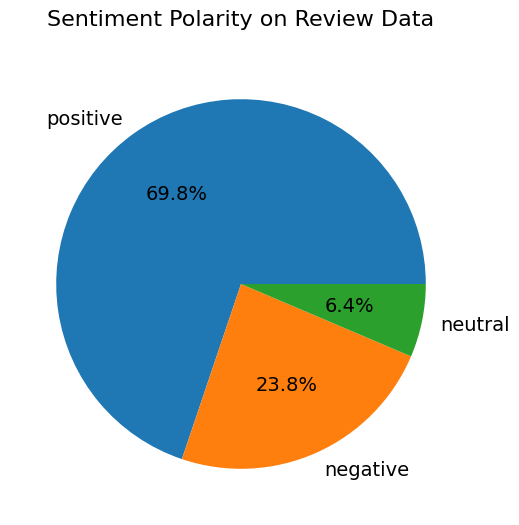

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [ ]:
# Menggabungkan semua teks
all_text = ' '.join(df['preprocessing_content'])

# Menggabungkan teks polarity positif, netral, dan negatif
positive = ' '.join(df[df['polarity'] == 'positive']['preprocessing_content'])
neutral = ' '.join(df[df['polarity'] == 'neutral']['preprocessing_content'])
negative = ' '.join(df[df['polarity'] == 'negative']['preprocessing_content'])

# Membuat word cloud untuk semua teks
wordcloud_all = WordCloud(width=600, height=300, background_color='white').generate(all_text)
wordcloud_positive = WordCloud(width=600, height=300, background_color='white').generate(positive)
wordcloud_neutral = WordCloud(width=600, height=300, background_color='white').generate(neutral)
wordcloud_negative = WordCloud(width=600, height=300, background_color='white').generate(negative)


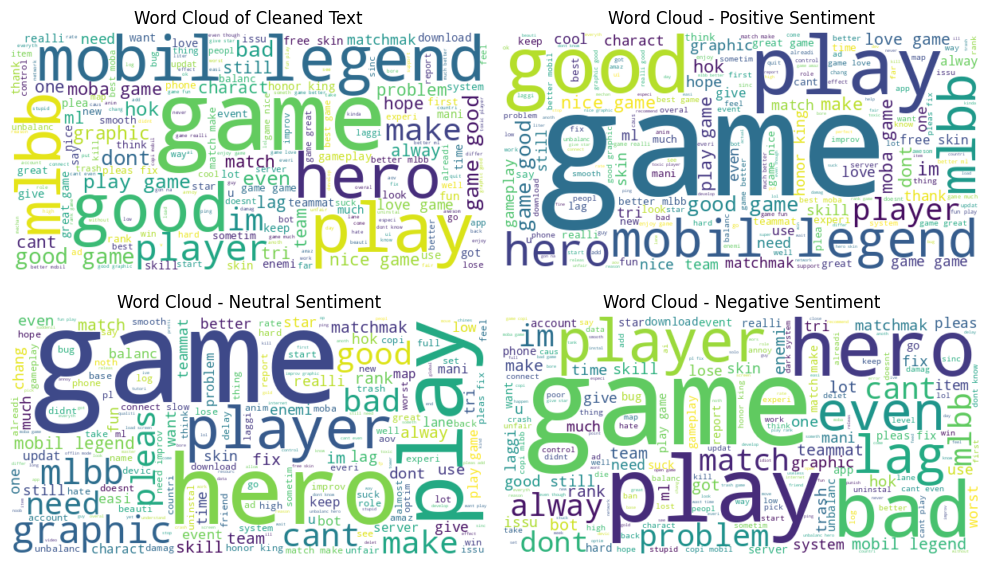

In [ ]:
# Menampilkan word cloud dalam subplot
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud of Cleaned Text')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud - Neutral Sentiment')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

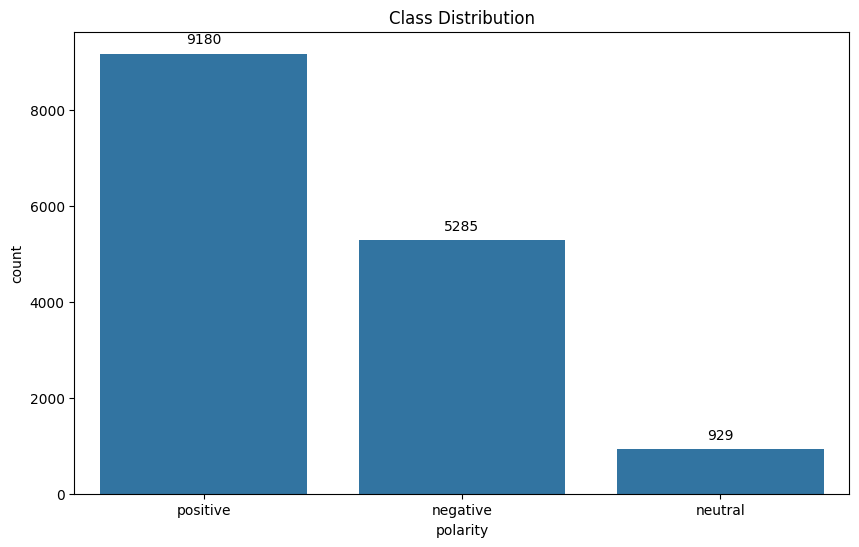

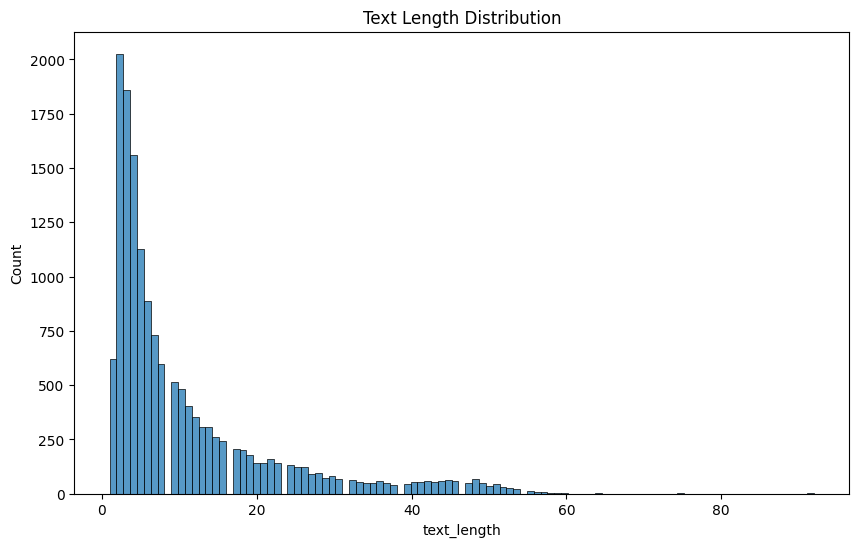

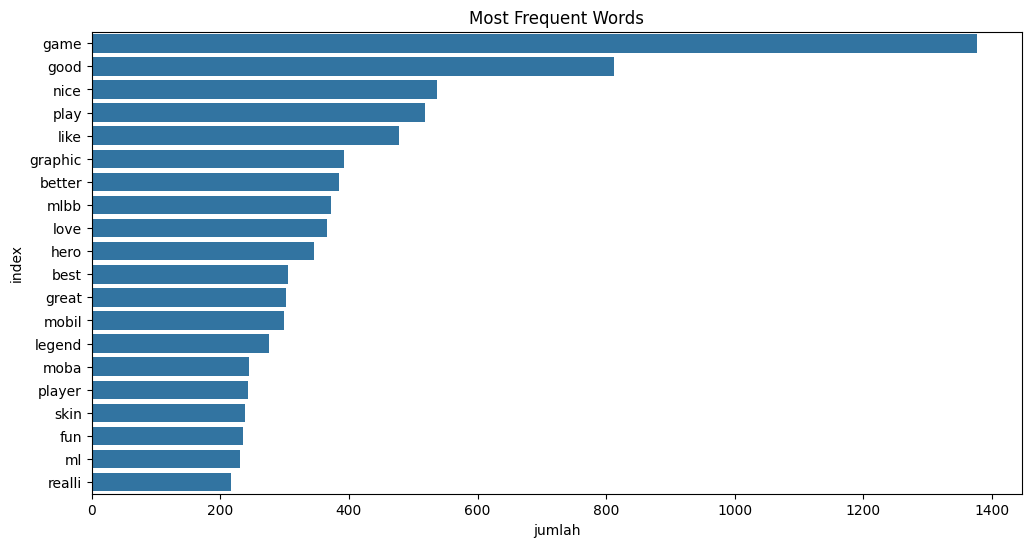

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
df['text_length'] = df['preprocessing_content'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessing_content'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [ ]:
df.to_csv('HOK_ReviewsUS_labeled.csv', index=False)

## **Data Splitting**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df['preprocessing_content']
y = LabelEncoder().fit_transform(df['polarity'])

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,abil,abl,absolut,acc,access,account,action,actual,ad,add,...,yall,ye,yeah,year,yet,yi,youll,your,youtub,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145688,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
print(pd.Series(y_train).value_counts())

2    8605
0    2927
1     783
Name: count, dtype: int64


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12315, 983), (3079, 983), (12315,), (3079,))

In [ ]:
# Function untuk training model
def fit_eval(model_name, X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))
    print("\n")

# Definisikan model machine learning yang akan digunakan
models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "RandomForest": RandomForestClassifier()
}

# Definisikan grid parameter untuk tuning masing-masing model
param_grids = {
    "LogisticRegression": {'penalty': ['l1', 'l2', 'elasticnet'],'C': [1, 10, 100], 'solver': ['liblinear']},
    "SVM": {'C': [1, 10, 100], 'gamma': ['scale', 'auto']},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "RandomForest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
    }

In [ ]:
# Evaluasi dengan TF-IDF
print("=== Evaluasi dengan TF-IDF ===")
best_models_tfidf = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models_tfidf[model_name] = best_model

    fit_eval(model_name, X_train, y_train, X_test, y_test, best_model)
    print(f"Best parameters: {grid_search.best_params_}")
    print("\n")

=== Evaluasi dengan TF-IDF ===
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: LogisticRegression
Train Accuracy: 0.943483556638246
Test Accuracy: 0.8999675219227021
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       733
           1       0.50      0.19      0.27       203
           2       0.93      0.97      0.95      2143

    accuracy                           0.90      3079
   macro avg       0.76      0.68      0.70      3079
weighted avg       0.88      0.90      0.89      3079



Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model: SVM
Train Accuracy: 0.9857084855866829
Test Accuracy: 0.8905488795063332
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       733
           1       0.45      0.17      0.25       203
           2  

In [ ]:
X_values = df['preprocessing_content'].values
y_values = df['polarity'].values

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(X_values, y_values, test_size=.2)

In [ ]:
# Tokenisasi
review_train_texts = [' '.join(review.split()) for review in review_train]
review_test_texts = [' '.join(review.split()) for review in review_test]

In [ ]:
# Tokenisasi dan padding
vocab_size = 5000
embedding_dim = 64
max_len = 200

tokenizer = Tokenizer(num_words=200, oov_token='<OOV>')
tokenizer.fit_on_texts(review_train_texts)

X_train_seq = tokenizer.texts_to_sequences(review_train_texts)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')

X_test_seq = tokenizer.texts_to_sequences(review_test_texts)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Merubah label yang sebelumnya str menjadi int
label_encoder = LabelEncoder()
label_train_encoded = label_encoder.fit_transform(label_train)
label_test_encoded = label_encoder.transform(label_test)

In [ ]:
# Definisi model LSTM
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Definisi model GRU
model_gru = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

# Compile model LSTM dan GRU
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Callback untuk early stopping
class EarlyStoppingWithWarning(EarlyStopping):
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print(f"\nTraining stopped early at epoch {self.stopped_epoch + 1}.")
        else:
            print("\nTraining completed without early stopping.")

In [ ]:
# Early stopping
early_stopping = EarlyStoppingWithWarning(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train LSTM model
history_nn = model_lstm.fit(X_train_pad, label_train_encoded,
                            epochs=10, batch_size=64,
                            validation_data=(X_test_pad, label_test_encoded),
                            callbacks=[early_stopping])

Epoch 1/10
226/226 [==============================] - 312s 1s/step - loss: 0.8053 - accuracy: 0.6405 - val_loss: 0.7032 - val_accuracy: 0.6807
Epoch 2/10
226/226 [==============================] - 299s 1s/step - loss: 0.6977 - accuracy: 0.6976 - val_loss: 0.6657 - val_accuracy: 0.7052
Epoch 3/10
226/226 [==============================] - 317s 1s/step - loss: 0.6667 - accuracy: 0.7051 - val_loss: 0.6465 - val_accuracy: 0.7052
Epoch 4/10
226/226 [==============================] - 298s 1s/step - loss: 0.6542 - accuracy: 0.7124 - val_loss: 0.6465 - val_accuracy: 0.7143
Epoch 5/10
226/226 [==============================] - 298s 1s/step - loss: 0.6489 - accuracy: 0.7135 - val_loss: 0.6507 - val_accuracy: 0.7057
Epoch 6/10
226/226 [==============================] - 297s 1s/step - loss: 0.6436 - accuracy: 0.7172 - val_loss: 0.6486 - val_accuracy: 0.7021

Training stopped early at epoch 6.


In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = preprocessing_text(kalimat_baru)


# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_cleaned])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'neutral':
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: bagus tapi sampah
Sentimen kalimat baru adalah POSITIF.


In [ ]:
balanced_df = pd.read_csv('HOK_IndonesianReviews_clean_fix.csv')

In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   content            12483 non-null  object
 1   content_clean      12483 non-null  object
 2   score              12483 non-null  int64 
 3   update_slangwords  12483 non-null  object
 4   polarity_score     12483 non-null  int64 
 5   polarity           12483 non-null  object
 6   text_length        12483 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 682.8+ KB


In [ ]:
balanced_df['prepro'] = balanced_df['content'].apply(preprocessing_text)

In [ ]:
balanced_df

,content,content_clean,score,update_slangwords,polarity_score,polarity,text_length,prepro
0,Banyak ketemu Dark system,banyak ketemu dark system,1,banyak ketemu gelap sistem,-7,negative,4,ketemu gelap sistem
1,Game yg banyak drak sistem ketika bermain solo,game yg banyak drak sistem ketika main solo,1,game yang banyak gelap sistem ketika main solo,-1,negative,8,game gelap sistem main solo
2,Kok pas dilobby ngelag banget tapi di ingame l...,kok pas dilobby ngelag banget tapi di ingame l...,1,kok pas dilobby lag banget tapi di ingame lanc...,-3,negative,10,pas dilobby lag banget ingame lancar
3,10 GAME 8X KETEMU TEAM AFK KNTOL,game x ketemu team afk kntol,1,game x ketemu team afk kontol,-5,negative,6,game x ketemu team afk kontol
4,baru selesai 2 pertandingan dah ngelag dan nge...,baru selesai tanding dah ngelag dan nge stuck ...,1,baru selesai tanding deh lag dan nge stuck pas...,1,neutral,14,selesai tanding deh lag nge stuck pas bersih m...
...,...,...,...,...,...,...,...,...
12478,lebih keren dari epep,lebih keren dari epep,5,lebih keren dari epep,7,positive,4,keren epep
12479,permainan sangat menarik,main sangat tarik,5,main sangat tarik,12,positive,3,main tarik
12480,Game sangat menyenangkan bagiku tapi kedepanny...,game sangat senang bagi tapi depan klo ada aku...,5,game sangat senang bagi tapi depan kalau ada a...,16,positive,16,game senang bagi depan akun joki band resah to...
12481,"ringan, bagus",ringan bagus,5,ringan bagus,9,positive,2,ringan bagus


In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   content            12483 non-null  object
 1   content_clean      12483 non-null  object
 2   score              12483 non-null  int64 
 3   update_slangwords  12483 non-null  object
 4   polarity_score     12483 non-null  int64 
 5   polarity           12483 non-null  object
 6   text_length        12483 non-null  int64 
 7   prepro             12483 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.3+ KB


In [ ]:
df = balanced_df[['content', 'prepro', 'score']]
df.to_csv('updateReview.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12483 non-null  object
 1   prepro   12483 non-null  object
 2   score    12483 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 292.7+ KB
